In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import itertools
import json

In [2]:
pip install openpyxl

In [3]:
data = pd.read_excel("Comments.xlsx",usecols =["Comments"], engine = 'openpyxl')
#data = data["Comments"]
data.head()

,Comments
0,It’s good that they have the return/replacemen...
1,Product is being shelled at high price if you ...
2,First time similar item received in damaged co...
3,Easy to use...nice product
4,Overall the product is good and the quality wh...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3449 entries, 0 to 3448
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Comments  3372 non-null   object
dtypes: object(1)
memory usage: 27.1+ KB


In [5]:
data[data['Comments'].duplicated(keep=False)].sort_values('Comments').head(8)

,Comments
606,(Device NOT Work)
700,(Device NOT Work)
1002,(Device NOT Work)
3046,...bisogna saperlo programmare in C++. Ho mess...
3037,...bisogna saperlo programmare in C++. Ho mess...
311,40mm fan + gard box me nehi
320,40mm fan + gard box me nehi
104,A cell was not detecting by the charger and wh...


In [6]:
data = data.drop_duplicates('Comments')

In [7]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['Comments'].values
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc.astype('U'))

In [8]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[100:300])

9457
['200', '2000', '2000rpm', '2000w', '200w', '2010', '2011', '2012', '2014', '2016', '2019', '2019it', '2020', '2021', '2040', '2048', '20days', '21', '21st', '22', '2200mah', '220v', '23', '230', '2341', '23litre', '24', '240p', '240v', '249', '25', '250', '250watt', '2560', '25mtr', '26', '27', '27mtr10mtrs', '290', '29th', '2a', '2a03', '2days', '2gb', '2kg', '2mm', '2nd', '2s', '2v', '2x', '30', '300', '3000', '300ml', '300rs', '300w', '30c', '30supply', '30v', '31vit', '32', '3200', '32256', '328', '328p', '32bit', '32u4', '32x32', '33', '35', '350', '35000', '35c', '35mm', '366', '37', '38', '380', '3898647641', '38height', '39', '3a', '3amps', '3b', '3d', '3k', '3ma', '3mnths', '3rd', '3s', '3star', '3v', '3v3', '3vconnect', '3vsellers', '3vなためarduino', '3vのデバイスを動かすための降圧チップが必要だったりとか何かと面倒', '3vの電源はあるものの面倒だった', '40', '400', '4000', '400rpm', '404', '40km', '40mm', '40s', '40x40', '41cons1', '4262', '44', '4400', '450', '464', '47', '4700', '48', '4809', '498', '499', '4b', '4f

C:\Users\Sabarish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [10]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc.astype('U'))
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50]) 

C:\Users\Sabarish\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  warnings.warn(


7467
["''", "'s", 'aa', 'aan', 'aangesloten', 'aarduino', 'aayjust', 'ab', 'abbastanza', 'abbia', 'abbiamo', 'abbondantement', 'aber', 'abfragen', 'abgedockt', 'abh', 'abierta', 'abil', 'abilitarla', 'abl', 'abnorm', 'abolladura', 'abov', 'abrirlo', 'abrufbaren', 'abrupt', 'absent', 'absolut', 'absoluto', 'absprach', 'abziehen', 'abzuspielen', 'ac', 'acabado', 'acceler', 'acceleratorlov', 'acceleromet', 'accendeva', 'accension', 'accept', 'acceptableaspect', 'accesa', 'access', 'accessori', 'accessorio', 'accettabil', 'accid', 'accident', 'accidentalment', 'accommod']


In [11]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc.astype('U'))
words = vectorizer3.get_feature_names()

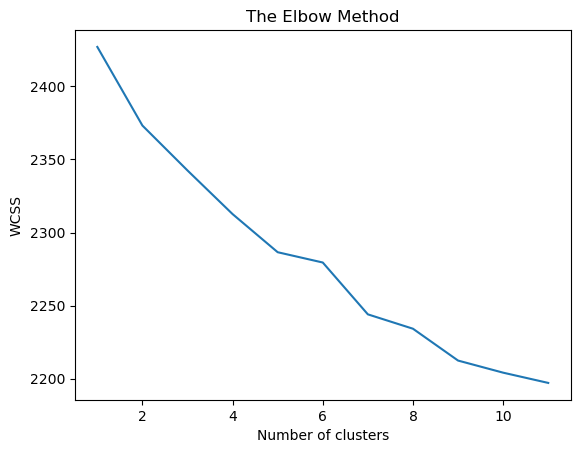

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_am.png')
plt.show()

In [25]:
kmeans = KMeans(n_clusters = 5, n_init = 20) 
kmeans.fit(X3)
# We look at the 5 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))


0 : use, arduino, board, work, great, veri, like, project, time, good, price, need, buy, easi, onli, just, qualiti, product, expect, connect, uno, cabl, control, love, power
1 : work, fine, perfect, great, proper, good, nice, qualiti, like, money, stop, receiv, product, use, just, sensor, expect, veri, price, cabl, excel, doe, wast, time, defect
2 : la, di, e, il, che, y, prodotto, arduino, es, que, el, non, ottimo, da, und, die, una, si, ist, ein, lo, original, le, scheda, r
3 : product, nice, work, veri, great, buy, excel, use, money, price, don't, bad, like, worst, receiv, good, awesom, rang, return, valu, damag, proper, temperatur, packag, wast
4 : good, product, veri, qualiti, work, price, expect, packag, item, project, buy, valu, money, use, deliveri, condit, pack, realli, purchas, far, nice, motor, issu, amazon, camera


In [27]:
# print("Prediction")

Y = vectorizer3.transform(data["Comments"].values.astype('U'))
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5=[],[],[],[],[]

for (i,j) in zip(prediction,data["Comments"].values.astype('U')):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "It’s good that they have the return/replacement policy. I had to return it because one of the channels wasn’t working, i had checked on t6config as well, channel 2 wasn’t responding. The replacement came quick and now everything works. But still I would recommend to buy the one that has screen on it because the software they provide is really old and doesn’t work with newer version of windows. I couldn’t find any working software for my mac as well, so i had fond a win8 system to configure it.",
  "First time similar item received in damaged condition.  Item was return and timely refund received.This time item was received in good condition, but Data cable, set-up CD &  manual were missing.Kindly arrange to deliver the missing items.Regards",
  "I buy this but in pakage  binding cable is not there and not back cover of battery for close it as in photo",
  "It is very genuine product. I have not done the range test yet but it seems like it's good in that part. Only drawback of this

0    1424
2     420
4     248
3     240
1     215
Name: prediction, dtype: int64

In [28]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c4:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c5:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)


print(count)
# print(json.dumps(questions, indent = 2, ensure_ascii = False))

[535, 33, 10, 45, 25]


In [29]:
kmeans = KMeans(n_clusters = 6, n_init = 20)
kmeans.fit(X3)
# We look at the 6 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : product, great, like, veri, work, price, use, buy, money, expect, excel, qualiti, ok, good, onli, time, love, receiv, camera, box, batteri, best, pi, just, got
1 : nice, product, veri, work, good, use, packag, motor, small, super, realli, low, price, fine, board, issu, rang, degre, pack, children, perfect, just, easi, valu, manual
2 : arduino, use, board, project, uno, easi, work, great, genuin, program, veri, need, code, origin, learn, product, makey, like, usb, thing, time, control, cabl, mani, buy
3 : good, product, veri, qualiti, work, price, packag, expect, item, valu, project, buy, money, use, deliveri, condit, issu, pack, realli, perfect, purchas, far, motor, camera, deal
4 : di, la, e, il, che, y, es, prodotto, arduino, el, que, non, ottimo, und, die, da, una, si, ist, original, lo, ein, scheda, der, ich
5 : work, fine, product, great, proper, perfect, good, use, qualiti, expect, like, don't, stop, money, receiv, veri, buy, doe, wast, just, charm, defect, cabl, time, sensor

In [30]:
# print("Prediction")

Y = vectorizer3.transform(data["Comments"].values.astype('U'))
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5,c6=[],[],[],[],[],[]

for (i,j) in zip(prediction,data["Comments"].values.astype('U')):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    elif i == 5:
        c6.append(j)

    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c6[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "Product is being shelled at high price if you want you can buy it from robu.in",
  "First time similar item received in damaged condition.  Item was return and timely refund received.This time item was received in good condition, but Data cable, set-up CD &  manual were missing.Kindly arrange to deliver the missing items.Regards",
  "I buy this but in pakage  binding cable is not there and not back cover of battery for close it as in photo",
  "It is very genuine product. I have not done the range test yet but it seems like it's good in that part. Only drawback of this transmitter is, it takes lot of power i.e batteries.",
  "आइटम अच्छा है।",
  "It's good ! I recommend if you really need an RC. I had some demotivation when I saw the packaging inside the box however. It was a bit crushed and deshaped near the control sticks, but it wasn't damaged so it's fine 👍",
  "Okay for biggners but give you all features",
  "Fantastic product as expected and fast delivery.",
  "Very nice prod

0    1167
2     406
4     371
5     263
3     256
1      84
Name: prediction, dtype: int64

In [31]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c4:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c5:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c6:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

print(count)

[340, 6, 213, 27, 9, 53]


In [32]:
kmeans = KMeans(n_clusters = 11, n_init = 20) 
kmeans.fit(X3)
# We look at the 11 clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : y, el, que, es, la, para, muy, n, producto, lo, en, excelent, calidad, origin, buena, m, bien, una, precio, o, tiempo, sin, s, las, pero
1 : product, work, buy, excel, don't, money, veri, worst, like, price, bad, use, return, damag, receiv, qualiti, wast, seller, temperatur, onli, proper, replac, good, awesom, love
2 : work, fine, perfect, proper, good, qualiti, like, stop, use, receiv, just, product, sensor, doe, veri, cabl, time, expect, price, money, devic, buy, don't, charm, excel
3 : nice, product, veri, work, good, use, packag, motor, small, super, realli, low, price, fine, board, issu, rang, pack, children, perfect, easi, manual, run, speed, simpl
4 : work, use, like, veri, expect, good, price, time, money, batteri, buy, cabl, camera, just, onli, box, qualiti, ok, love, connect, pi, got, bought, receiv, return
5 : great, work, product, use, price, valu, camera, pi, arriv, learn, project, easi, fun, servic, board, qualiti, good, littl, raspberri, nice, arduino, thank, excel, 

In [34]:
# print("Prediction")

Y = vectorizer3.transform(data["Comments"].values.astype('U'))
prediction = kmeans.predict(Y)
# print(prediction)

c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11=[],[],[],[],[],[],[],[],[],[],[]

for (i,j) in zip(prediction,data["Comments"].values.astype('U')):
    if i == 0:
        c1.append(j)
    elif i == 1:
        c2.append(j)
    elif i == 2:
        c3.append(j)
    elif i == 3:
        c4.append(j)
    elif i == 4:
        c5.append(j)
    elif i == 5:
        c6.append(j)
    elif i == 6:
        c7.append(j)
    elif i == 3:
        c8.append(j)
    elif i == 4:
        c9.append(j)
    elif i == 5:
        c10.append(j)
    elif i == 6:
        c11.append(j)
    

print(json.dumps(c1[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c2[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c3[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c4[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c5[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c6[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c7[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c8[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c9[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c10[:10], indent = 2, ensure_ascii = False),"\n\n")
print(json.dumps(c11[:10], indent = 2, ensure_ascii = False),"\n\n")
ans = pd.DataFrame()
ans["prediction"] = prediction
ans["prediction"].value_counts()

[
  "O rapaz adorou, agora é só invenções.",
  "Es útil para las clases de música con niños.",
  "El dispositivo llegó bien empaquetado y protegido, pero:- El hardware estaba defectuoso. Una de las conexiones no funcionaba en absoluto. No soy torpe con los dispositivos, los cables estaban bien (se probaron con otras conexiones y funcionaban).- No se indicaba la versión de Makey-Makey. Una es programable desde el software de arduino y la otra a través de una web de ellos que simplifica la cosa pero no te permite hacer mucho más que lo que hay allí. Yo pregunté acerca de la versión antes de comprarlo y no recibí respuesta. Era la segunda y para mí fue una decepción. Lo devolví a través de Amazon y aún estoy esperando la devolución del dinero, que ya he reclamado dos veces y espero esté efectiva en breve.En cuanto al dispositivo es muy divertido para trabajar con niños o si estás interesado en hacer alguna instalación artística (si tienes la primera versión). Pienso comprar otro que esper

4     1003
7      352
8      237
10     187
2      186
1      177
0       92
5       89
9       85
3       82
6       57
Name: prediction, dtype: int64

In [35]:
que = ["what", "why", "when", "where", "name", "how", "does", "which", "would", "could", "should", "has", "have", "whom", "whose", "question"]

# This is amazing. Thank you for showing all these sensor capabilities. Really inspires ideas for me
count = []
count1 = 0
for i in c1:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c2:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c3:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c4:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c5:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c6:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c7:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c8:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c9:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c10:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

count1=0
for i in c11:
    z=i.lower()
    if any(q in z for q in que):
        count1+=1
count.append(count1)

print(count)

[2, 40, 32, 6, 330, 18, 0, 0, 0, 0, 0]
